## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

## Read in DataFrame from Excel

In [2]:
df = pd.read_excel(r'S:\Code\School\WGU_DataAnalyst_NanoDegree\05 - Data Visualization\OISdata.xlsx', sheet_name='Data')
#Preview of First 10 Records
df.head(10)

,Number,DATETIME,INTERVAL,MONTH,DOW,YEAR,label,TIME,HOUR,Date
0,1,2014-01-28 19:55:00,46.000000,Jan,Tuesday,2014,2014 - 1,2014-01-28 19:55:00,19,2014-01-28 19:55:00
1,2,2014-02-28 12:35:00,30.694444,Feb,Friday,2014,2014 - 2,2014-02-28 12:35:00,12,2014-02-28 12:35:00
2,3,2014-03-01 20:33:00,1.331944,Mar,Saturday,2014,2014 - 3,2014-03-01 20:33:00,20,2014-03-01 20:33:00
3,4,2014-03-13 06:13:00,11.402778,Mar,Thursday,2014,2014 - 4,2014-03-13 06:13:00,6,2014-03-13 06:13:00
4,5,2014-03-18 18:19:00,5.504167,Mar,Tuesday,2014,2014 - 5,2014-03-18 18:19:00,18,2014-03-18 18:19:00
5,6,2014-04-05 00:18:00,17.249306,Apr,Saturday,2014,2014 - 6,2014-04-05 00:18:00,0,2014-04-05 00:18:00
6,7,2014-04-26 11:01:00,21.446528,Apr,Saturday,2014,2014 - 7,2014-04-26 11:01:00,11,2014-04-26 11:01:00
7,8,2014-05-27 17:13:00,31.258333,May,Tuesday,2014,2014 - 8,2014-05-27 17:13:00,17,2014-05-27 17:13:00
8,9,2014-06-05 08:20:00,8.629861,Jun,Thursday,2014,2014 - 9,2014-06-05 08:20:00,8,2014-06-05 08:20:00
9,10,2014-06-21 21:06:00,16.531944,Jun,Saturday,2014,2014 - 10,2014-06-21 21:06:00,21,2014-06-21 21:06:00


## Visualize the distribution of days between Officer Involved Shootings (interval column)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002231101BFD0>]],
      dtype=object)

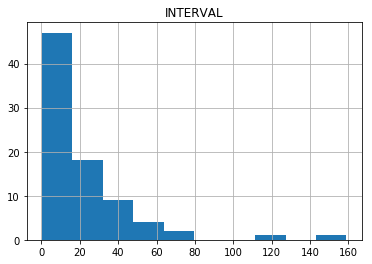

In [3]:
#Histogram
df.hist(column='INTERVAL')

## Convert 'DATE' column to a numeric EPOCH time

In [4]:
test = df.groupby('Date').count()['Number']
test = test.reset_index()
test['Date'] = pd.to_numeric(test['Date']) 
test.head()

,Date,Number
0,1390938900000000000,1
1,1393590900000000000,1
2,1393705980000000000,1
3,1394691180000000000,1
4,1395166740000000000,1


## Instantiate and Fit K-Means Model to Numeric Date Data

In [5]:
#Create and Fit Model
mod = KMeans(n_clusters=15)
mod.fit(test)

#Create a labels (labs) column for kmeans category label
test['labs'] = mod.labels_

## Convert Data Back to DateTime

In [6]:
test['Date'] = pd.to_datetime(test['Date'])
test['year'] = test['Date'].dt.year
test.head()

,Date,Number,labs,year
0,2014-01-28 19:55:00,1,6,2014
1,2014-02-28 12:35:00,1,6,2014
2,2014-03-01 20:33:00,1,6,2014
3,2014-03-13 06:13:00,1,6,2014
4,2014-03-18 18:19:00,1,6,2014


## Create a Text Label for Each Unique Label Integer

In [7]:
for lab in test['labs'].unique():
    temp_df = test.loc[test['labs'] == lab, :]
    first_date = temp_df.iloc[0]['Date'].strftime('%m/%d/%Y')
    last_date = temp_df.iloc[-1]['Date'].strftime('%m/%d/%Y')
    date_str = first_date + ' - ' + last_date
    test.loc[test['labs'] == lab, 'Text Range'] = date_str
test.head(15)

,Date,Number,labs,year,Text Range
0,2014-01-28 19:55:00,1,6,2014,01/28/2014 - 04/26/2014
1,2014-02-28 12:35:00,1,6,2014,01/28/2014 - 04/26/2014
2,2014-03-01 20:33:00,1,6,2014,01/28/2014 - 04/26/2014
3,2014-03-13 06:13:00,1,6,2014,01/28/2014 - 04/26/2014
4,2014-03-18 18:19:00,1,6,2014,01/28/2014 - 04/26/2014
5,2014-04-05 00:18:00,1,6,2014,01/28/2014 - 04/26/2014
6,2014-04-26 11:01:00,1,6,2014,01/28/2014 - 04/26/2014
7,2014-05-27 17:13:00,1,2,2014,05/27/2014 - 08/08/2014
8,2014-06-05 08:20:00,1,2,2014,05/27/2014 - 08/08/2014
9,2014-06-21 21:06:00,1,2,2014,05/27/2014 - 08/08/2014


## Create Helper Analysis File For Easier Labeling/Exploration of Data Vis

In [8]:
analysis_data = pd.DataFrame()
for label in test['labs'].unique():
    p = test.loc[test['labs'] == label, :]
    td = (p.iloc[-1]['Date'] - p.iloc[0]['Date']).days
    cluster = p['labs'].max()
    length = len(p)
    day_delta = []
    for i in range(0, len(p)):
        if i != 0:
            day_delta.append((p.iloc[i]['Date'] - p.iloc[i-1]['Date']).days)
    day_delta_mean = np.mean(day_delta)
    row = pd.DataFrame([[cluster, length, p.iloc[0]['Date'], p.iloc[-1]['Date'], td, day_delta_mean]])
    analysis_data = analysis_data.append(row)
    
analysis_data.columns = ['Label', 'Length', 'Start_Date', 'End_Date', 'time_delta', 'Mean']

## Make Date Field Year 2016 for All Records to Trick Visualization

In [9]:
test['Date'] = test.Date.apply(lambda dt: dt.replace(year=2016))

## Export DataFrames to Excel

In [11]:
test.to_excel(r'S:\Code\School\WGU_DataAnalyst_NanoDegree\05 - Data Visualization\Visualization_Data.xlsx', index=False)
analysis_data.to_excel(r'S:\Code\School\WGU_DataAnalyst_NanoDegree\05 - Data Visualization\OISdata_analysis.xlsx', index=False)